In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

df = pd.read_csv('/Users/Han/pete/soton/adML/groupwork/train.csv',sep=',')
#df.head()
#df.describe()
#print(df.isnull().sum())

In [2]:
# categorical to float
le = LabelEncoder()
df['Product_Info_2'] = le.fit_transform(df['Product_Info_2'])


In [3]:
# fill na with 0 , change type to float64
col = df.columns
df[col] = df[col].astype('float64')
df.drop('Id',axis=1,inplace=True)
df_length = len(df)
df.isnull().sum()
df.fillna(0, inplace=True)

In [4]:
# filter columns where have 50% percent of zero value 
zeros_dic = {}
for cols in df.columns:
    zeros_value = (df[cols] == float(0)).sum()
    zeros_dic[cols] = zeros_value

percent_dic = {}
for k, v in zeros_dic.items():
    percent_dic[k] = v/df_length
    
filter_list = []
for k,v in percent_dic.items():
    if v > 0.5:
        filter_list.append(k)
        
df.drop(filter_list, axis=1, inplace=True)

In [5]:
# normalzie Medical_History_1 Medical_History_2, Employment_Info_2, Product_Info_2, Product_Info_3
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
norm_col = ['Medical_History_1', 'Medical_History_2', 'Employment_Info_2', 'Product_Info_2', 'Product_Info_3']

np_scaled = min_max_scaler.fit_transform(df[norm_col])
#np.unique(df['Product_Info_2'].values)

np_scaled.shape
df_norm = pd.DataFrame(np_scaled, columns=['Medical_History_1_norm', 'Medical_History_2_norm', 'Employment_Info_2_norm', 'Product_Info_2_norm', 'Product_Info_3_norm'])
df.join(df_norm)
df.drop(['Medical_History_1', 'Medical_History_2', 'Employment_Info_2', 'Product_Info_2', 'Product_Info_3'],axis=1, inplace=True)

# data 1.0
df.to_csv('cleaned_data1.csv')

In [6]:
# train test split
from sklearn.model_selection import train_test_split
target = df['Response']

feature_col = df.columns[:-1]
X = df[feature_col]
Y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [7]:
# model
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
pred = np.clip(pred, 1,8)
prediction_result = np.round(pred)

/Users/Han/miniconda2/envs/py35/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


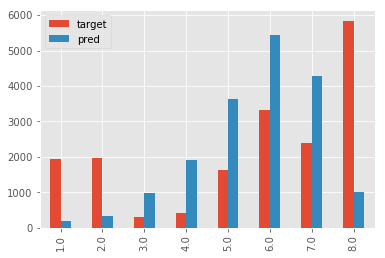

In [8]:
# plot result
plt.style.use('ggplot')

target_dis = y_test.value_counts().sort_index()
pred_dis = pd.Series(prediction_result).value_counts().sort_index()

plt.figure(figsize=(20, 10))
df_plot = pd.concat([target_dis, pred_dis], axis=1)
df_plot.columns = ['target','pred']
df_plot.plot.bar()
plt.show()

In [9]:
# check variable paramters which greater than 0.5 in model
ser = pd.Series(model.coef_ > 0.5)

fea_index = ser[ser == True].index
fea_gt05 = pd.Series(X_test.columns)[fea_index]
fea_gt05
#who / whos

1         Product_Info_4
6                     Ht
32     Medical_History_4
35     Medical_History_7
38    Medical_History_11
46    Medical_History_20
52    Medical_History_27
63    Medical_History_39
64    Medical_History_40
dtype: object

In [11]:
# data test for predicting 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
df_test = pd.read_csv('/Users/Han/pete/soton/adML/groupwork/test.csv',sep=',')


le = LabelEncoder()
df_test['Product_Info_2'] = le.fit_transform(df_test['Product_Info_2'])

col = df_test.columns
df_test[col] = df_test[col].astype('float64')
df_test.drop('Id', axis=1, inplace=True)
df_length = len(df_test)
df_test.isnull().sum()
df_test.fillna(0, inplace=True)

zeros_dic = {}
for cols in df_test.columns:
    zeros_value = (df_test[cols] == float(0)).sum()
    zeros_dic[cols] = zeros_value

percent_dic = {}
for k, v in zeros_dic.items():
    percent_dic[k] = v / df_length

filter_list = []
for k, v in percent_dic.items():
    if v > 0.5:
        filter_list.append(k)
df_test.drop(filter_list, axis=1, inplace=True)


from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_test)
norm_col = ['Medical_History_1', 'Medical_History_2', 'Employment_Info_2', 'Product_Info_2', 'Product_Info_3']
np_scaled = min_max_scaler.fit_transform(df_test[norm_col])


np_scaled.shape
df_norm = pd.DataFrame(np_scaled, columns=['Medical_History_1_norm', 'Medical_History_2_norm', 'Employment_Info_2_norm', 'Product_Info_2_norm', 'Product_Info_3_norm'])
df_test.join(df_norm)
df_test.drop(['Medical_History_1', 'Medical_History_2', 'Employment_Info_2', 'Product_Info_2', 'Product_Info_3'],axis=1, inplace=True)





In [12]:
test_pred = model.predict(df_test)
test_pred = np.clip(test_pred, 1, 8)
test_pred = np.round(test_pred).astype(int)

In [13]:
df_tmp = pd.read_csv('/Users/Han/pete/soton/adML/groupwork/test.csv')

new_pred = pd.DataFrame({"Id": df_tmp['Id'].values, "Response": test_pred})
new_pred = new_pred.set_index('Id')
new_pred.to_csv('linear_try.csv')

In [ ]:
# correlation between feature 
np.corrcoef(df)